# Lyrical and Comparative Analysis of Misogyny in Rap Music

## Data

Import dataset

In [ ]:
import numpy as np
import pandas as pd
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import string
import nltk
import itertools
import scipy.stats

nltk.download('stopwords')

File import & iteration

In [ ]:
# Pathnames of files

for dirname, _, filenames in os.walk('/content/drive/MyDrive/QTM340 Final Project/lyrics/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Connect colab to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = {}
frames = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/QTM340 Final Project/lyrics/'):

    for filename in filenames:
        rapper = os.path.join(dirname, filename)[51:-11]
        with open(os.path.join(dirname, filename), encoding='latin1') as f:
            content = f.read().splitlines()
            for i in range(len(content)-2, -1, -1):
                if not content[i] == '':
                    content[i] = content[i] + ' ' + content.pop(i+1)
            data['rapper'], data['verse'] = rapper, content[1::2]
            df_temp = pd.DataFrame(data)
            frames.append(df_temp)
            df = pd.concat(frames)

pd.set_option('max_colwidth', None)

## EDA

In [ ]:
# check df
print(len(df))

# Drop Duplicates
df = df.drop_duplicates(subset=['verse'])
print(len(df))

5094
4578


In [ ]:
df.head()

,rapper,verse
0,A$AP Ant,Chickens in the sink Crack on the stove Triple beam for the weight Cut the middle man tryna get 8 white bitches Snorting off the plate coke from Colombia Riding round in the Benz looking like a trap star Flipping raw day and night Tryna get my money right naw I ain't living rite Fucking bitches all night kick 'em out the next day Everyday is pay day Hit me with a half bring it back in two days Living in Cali by the ocean Condo got em open Long dick stroke em I send 'em to the husband he over there fussing I'm over here fucking no loving Puffing on heavenly rock star 70's Slim pants ripped jeans Jeremy Scott wings Fucking heavily counting up cream Rolling on beans disobedient with trees Tatted from neck to ear bitches they want to stare Macking with hoes as I pose Hand in my draws henny out my pores As I pour hit the blunt too much you on the dash as I pass (Hook) Coke and White Bitches Coke and White Bitches Just Coke and White Bitches Coke and White Bitches Coke and White Bitches Just Coke and White Bitches Coke and White Bitches Coke and White Bitches


In [ ]:
# Remove non-English characters while keeping punctuations
def remove_non_english(text):
    return re.sub(r'[^a-zA-Z,!.?\'"\-]', ' ', text)

In [ ]:
df['verse'] = df['verse'].apply(remove_non_english)

In [ ]:
# preprocess verses to lower case, remove line feed

stopwords = nltk.corpus.stopwords.words('english')

def preprocess_verse(verse, stopwords):

    verse = verse.lower()
    verse = verse.replace('\n\n',' ')
    verse = ' '.join([word for word in verse.split() if word not in stopwords])
    return verse

In [ ]:
df['verse_preprocessed'] = df['verse'].map(lambda x:preprocess_verse(x, stopwords))

In [ ]:
df[df['rapper']=='Kendrick Lamar'].head()

,rapper,verse,verse_preprocessed
0,Kendrick Lamar,"Nobody pray for me It's been that day for me Waaaaay yeah, yeah!","nobody pray day waaaaay yeah, yeah!"
1,Kendrick Lamar,"Bitch, be humble hol up, bitch Sit down hol up, lil', hol up, lil' bitch Be humble hol' up, bitch Sit down hol' up, sit down, lil , sit down, lil' bitch Be humble hol' up, hol' up Bitch, sit down hol' up, hol' up, lil' bitch Be humble lil' bitch, hol' up, bitch Sit down hol' up, hol' up, hol' up, hol' up Be humble hol' up, hol' up Sit down hol' up, hol' up, lil', hol' up, lil' bitch Be humble hol' up, bitch Sit down hol' up, sit down, lil', sit down, lil' bitch Be humble hol' up, hol' up Bitch, sit down hol' up, hol' up, lil' bitch Be humble lil' bitch, hol' up, bitch Sit down hol' up, hol' up, hol' up, hol' up","bitch, humble hol up, bitch sit hol up, lil', hol up, lil' bitch humble hol' up, bitch sit hol' up, sit down, lil , sit down, lil' bitch humble hol' up, hol' bitch, sit hol' up, hol' up, lil' bitch humble lil' bitch, hol' up, bitch sit hol' up, hol' up, hol' up, hol' humble hol' up, hol' sit hol' up, hol' up, lil', hol' up, lil' bitch humble hol' up, bitch sit hol' up, sit down, lil', sit down, lil' bitch humble hol' up, hol' bitch, sit hol' up, hol' up, lil' bitch humble lil' bitch, hol' up, bitch sit hol' up, hol' up, hol' up, hol'"
2,Kendrick Lamar,"Bitch, be humble hol' up, bitch Sit down hol' up, lil', hol' up, lil' bitch Be humble hol' up, bitch Sit down hol' up, sit down, lil', sit down, lil' bitch Be humble hol' up, hol' up Bitch, sit down hol' up, hol' up, lil' bitch Be humble lil' bitch, hol' up, bitch Sit down hol' up, hol' up, hol' up, hol' up Be humble hol' up, hol' up Sit down hol' up, hol' up, lil', hol' up, lil' bitch Be humble hol' up, bitch Sit down hol' up, sit down, lil', sit down, lil' bitch Be humble hol' up, hol' up Bitch, sit down hol' up, hol' up, lil' bitch Be humble lil' bitch, hol' up, bitch Sit down hol' up, hol' up, hol' up, hol' up If Pirus and Crips all got along They'd probably gun me down by the end of this song Seem like the whole city go against me Every time I'm in the street, I hear YAWK! YAWK! YAWK! YAWK!","bitch, humble hol' up, bitch sit hol' up, lil', hol' up, lil' bitch humble hol' up, bitch sit hol' up, sit down, lil', sit down, lil' bitch humble hol' up, hol' bitch, sit hol' up, hol' up, lil' bitch humble lil' bitch, hol' up, bitch sit hol' up, hol' up, hol' up, hol' humble hol' up, hol' sit hol' up, hol' up, lil', hol' up, lil' bitch humble hol' up, bitch sit hol' up, sit down, lil', sit down, lil' bitch humble hol' up, hol' bitch, sit hol' up, hol' up, lil' bitch humble lil' bitch, hol' up, bitch sit hol' up, hol' up, hol' up, hol' pirus crips got along they'd probably gun end song seem like whole city go every time i'm street, hear yawk! yawk! yawk! yawk!"
3,Kendrick Lamar,"Brace yourself, I'll take you on a trip down memory lane This is not a rap on how I'm slingin' crack or move cocaine This is cul-de-sac and plenty Cognac and major pain Not the drill sergeant, but the stress that weighin' on your brain It was me, L Boog, and Yan Yan, YG Lucky ride down Rosecrans It got ugly, wavin' yo' hand out the window check yourself! Uh, Warriors and Conans, hope euphoria can slow dance With society, the driver seat the first one to get killed Seen a light-skinned nigga with his brains blown out At the same burger stand where beep hang out Now this is not a tape recorder sayin' that he did it But ever since that day, I was lookin' at him different That was back when I was nine, Joey packed the nine Pakistan on every porch is fine, we adapt to crime Pack a van with four guns at a time With the sliding door, fuck is up? Fuck you shootin' for if you ain't walkin' up, you fuckin' punk? Pickin' up the fuckin' pump, pickin' off you suckers Suck a dick or die or sucker punch A wall of bullets comin' from AK's, AR's, ""Aye, y'all duck!"" That's what Momma said when we was eatin' that free lunch Aw man, goddamn, all hel

In [ ]:
# Count how many times word "bitch" appears in each verse
col = 'verse'
string = 'bitch'

df['num_misogyny'] = df[col].str.contains(string, case=False)
count = df['num_misogyny'].sum()

print(count)

1054


In [ ]:
df['verse_preprocessed'] = df['verse'].map(lambda x:preprocess_verse(x, stopwords))

In [ ]:
# Word Cloud

def word_cloud_by_rapper(rapper, col):

    df_temp = df[df.rapper==rapper]

    text = ' '.join(str(comment) for comment in df_temp[col])

    wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white",max_words=100).generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.rcParams['figure.figsize'] = (20, 20)
    plt.axis("off")
    plt.show()

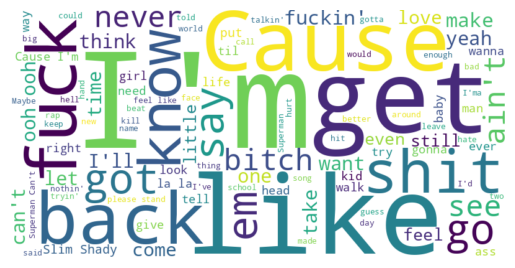

In [ ]:
word_cloud_by_rapper('Eminem', 'verse')

Word Embedding

In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [ ]:
verse_vec = []
model_verse_20 = Word2Vec(sentences=df['verse_preprocessed'],
                          vector_size=20,
                          window=5,
                          min_count=1,
                          workers=1,
                          seed=10010)

for _, row in df.iterrows():
    vectors = [model_verse_20.wv[word] for word in row['verse_preprocessed'] if word in model_verse_20.wv]

    if vectors:
        # stack the vectors into a matrix
        matrix = np.vstack(vectors)
        # calculate the mean along axis 0 (columns)
        mean_vector = np.mean(matrix, axis=0)
        verse_vec.append(mean_vector)
    else:
        # if no words in vocabulary, append an array of zeros
        verse_vec.append(np.zeros(20))

# convert list of vectors into a numpy array
verse_vec = np.vstack(verse_vec)

In [ ]:
# check the shape
verse_vec.shape

(4578, 20)

In [ ]:
# check the numpy array structure
verse_vec

array([[-0.03994927, -0.1340065 ,  0.28621414, ..., -0.02976182,
         0.26164478,  0.12221795],
       [ 0.03970994, -0.17014948,  0.21392585, ...,  0.00204271,
         0.27160236,  0.07649836],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.1359175 , -0.09575215,  0.040588  , ...,  0.00248777,
         0.30015475,  0.27321872],
       [ 0.03118203, -0.08372213,  0.12817763, ...,  0.04476095,
         0.24599895,  0.08884716],
       [ 0.09225487, -0.08600318,  0.16895184, ..., -0.18840684,
         0.15715116,  0.08047455]])

Misogynistic words

In [ ]:
# labeled reddit posts

words_label = pd.read_csv("/content/drive/MyDrive/QTM340 Final Project/Misogynies/final_labels.csv")

In [ ]:
# only take two columns
words_label = words_label[['body','level_1']]

In [ ]:
words_label.shape

(6567, 2)

In [ ]:
# get misogynistic words
miswords_label = words_label[words_label['level_1'] == 'Misogynistic']

In [ ]:
type(miswords_label['body'])

pandas.core.series.Series

In [ ]:
# get nonmisogynistic words
nonmiswords_label = words_label[words_label['level_1'] == 'Nonmisogynistic']

In [ ]:
type(nonmiswords_label['body'])
nonmiswords_label.shape

(5868, 2)

In [ ]:
miswords_label.shape

(699, 2)

In [ ]:
# embedding misogynistic words
model_misWords_20 = Word2Vec(sentences=miswords_label['body'],
                 vector_size=20,
                 window=5,
                 min_count=10,
                 workers=1,
                 seed = 10010)

In [ ]:
model_misWords_20.wv.vectors

array([[-0.64849347, -0.08320367, -0.5779031 , ..., -1.0779858 ,
         0.47048447, -0.1552479 ],
       [-0.50560135,  0.7534031 , -0.8576336 , ..., -0.9266101 ,
         0.48582044,  0.81494755],
       [ 0.25432798,  0.15178218, -0.8632258 , ..., -0.861701  ,
         1.1633577 , -0.07949638],
       ...,
       [ 0.13038562, -0.78946257,  0.9096615 , ...,  0.06572035,
        -1.3851842 , -0.28220713],
       [ 0.1643301 , -0.6513076 ,  0.8337183 , ...,  0.2648326 ,
        -0.2875073 ,  0.00858642],
       [ 0.1065272 , -0.58550596,  0.5553754 , ...,  0.17271422,
        -0.6391906 ,  0.00947655]], dtype=float32)

In [ ]:
#embedding nonmisogynistic words
nonmiswords = nonmiswords_label['body'].astype(str)
model_nonmisWords_20 = Word2Vec(sentences=nonmiswords,
                 vector_size=20,
                 window=5,
                 min_count=10,
                 workers=1,
                 seed = 10086)

In [ ]:
model_nonmisWords_20.wv.vectors

array([[ 1.1472311 , -0.4042882 , -0.21001782, ..., -0.69595706,
        -0.7808905 , -0.3772308 ],
       [ 0.8177458 ,  0.68165374, -0.8586288 , ..., -0.14655484,
        -0.39951503, -1.174682  ],
       [-0.26882485, -0.23057428, -1.1712543 , ..., -0.16739027,
        -0.24428846, -1.4901321 ],
       ...,
       [-0.14842728,  0.43247852,  0.07198071, ..., -0.07136198,
         0.26867476,  0.15749046],
       [-0.23911592,  0.26372373,  0.1806368 , ...,  0.02497213,
         0.26162168,  0.2274956 ],
       [-0.19525068,  0.311248  ,  0.02902937, ...,  0.39601365,
         0.4926582 ,  0.37162715]], dtype=float32)

Calculate the similarity of vectors

In [ ]:
nonmiswords_vec = np.mean(model_nonmisWords_20.wv.vectors, axis=0)
miswords_vec = np.mean(model_misWords_20.wv.vectors, axis=0)

In [ ]:
nonmiswords_vec.shape

(20,)

In [ ]:
miswords_vec.shape

(20,)

In [ ]:
from numpy.linalg import norm
def cosine_similarity(vector_a, vector_b):
    dot_product = np.dot(vector_a, vector_b)
    norm_a = norm(vector_a)
    norm_b = norm(vector_b)

    similarity = dot_product / (norm_a * norm_b)
    return similarity

def calculate_cosine_similarity(row):
    return cosine_similarity(row, miswords_vec)

In [ ]:
cosine_similarities_rap_mis = np.apply_along_axis(calculate_cosine_similarity, axis=1, arr=verse_vec)

<ipython-input-38-deb01aa47701>:7: RuntimeWarning: invalid value encountered in double_scalars
  similarity = dot_product / (norm_a * norm_b)


In [ ]:
cosine_similarities_rap_mis

array([0.51013506, 0.43476398,        nan, ..., 0.35100022, 0.48287068,
       0.58315623])

In [ ]:
cosine_similarities_rap_mis = np.nan_to_num(cosine_similarities_rap_mis, nan=0)


In [ ]:
len(cosine_similarities_rap_mis)

4578

In [ ]:
df.shape

(4578, 4)

Non-rap songs

In [ ]:
artist_df = pd.read_csv("/content/drive/MyDrive/QTM340 Final Project/Misogynies/artists-data.csv")
song_df = pd.read_csv("/content/drive/MyDrive/QTM340 Final Project/Misogynies/lyrics-data.csv")

In [ ]:
artist_df.head()

,Artist,Genres,Songs,Popularity,Link
0,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/
1,Chiclete com Banana,Axé,268.0,3.8,/chiclete-com-banana/
2,Banda Eva,Axé; Romântico; Reggae,215.0,2.3,/banda-eva/
3,É O Tchan,Axé,129.0,1.6,/e-o-tchan/
4,Claudia Leitte,Pop; Axé; Romântico,167.0,1.5,/claudia-leitte/


In [ ]:
song_df.head()

,ALink,SName,SLink,Lyric,language
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\nÉ amar você\nAmar você\n\nO seu amor é como uma chama acesa\nQueima de prazer\nDe prazer\n\nEu já falei com Deus que não vou te deixar\nVou te levar pra onde for\nQualquer lugar\nJá fiz de tudo pra não te perder\n\nArerê,\nUm lobby, um hobby, um love com você\nArerê,\nUm lobby, um hobby, um love com você\n\nCai, cai, cai, cai, cai pra cá\nHey, hey, hey\nTu-do,tu-do, vai rolar",pt
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim.html,Meu coração\nSem direção\nVoando só por voar\nSem saber onde chegar\nSonhando em te encontrar\nE as estrelas\nQue hoje eu descobri\nNo seu olhar\nAs estrelas vão me guiar\n\nSe eu não te amasse tanto assim\nTalvez perdesse os sonhos\nDentro de mim\nE vivesse na escuridão\nSe eu não te amasse tanto assim\nTalvez não visse flores\nPor onde eu vi\nDentro do meu coração\n\nHoje eu sei\nEu te amei\nNo vento de um temporal\nMas fui mais\nMuito além\nDo tempo do vendaval\nNos desejos\nNum beijo\nQue eu jamais provei igual\nE as estrelas dão um sinal\n\nSe eu não te amasse tanto assim\nTalvez perdesse os sonhos\nDentro de mim\nE vivesse na escuridão\nSe eu não te amasse tanto assim\nTalvez não visse flores\nPor onde eu vi\nDentro do meu coração...,pt
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,"É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!\nÉ de balacubaca!\ntetetetere tere tete tere tetere\n\nEu quero beijar a sua boca louca\nEu quero beijar a sua boca louca\nEu vou enfiar uva no céu da sua boca\nEu vou enfiar uva no céu da sua boca\n\nE aí?\nChupa toda, disse toda\nE aí?\nChupa toda, disse toda\n\nÉ de babaixá!\nÉ de balacubaca!\nÉ de babaixá!\nÉ de balacubaca!\ntetetetere tere tete tere tetere\n\nEu quero beijar a sua boca louca\nEu quero beijar a sua boca louca\nEu vou enfiar uva no céu da sua boca\nEu vou enfiar uva no céu da sua boca\n\nE aí?\nChupa toda, disse toda\nE aí?\nChupa toda, disse toda\n\n",pt
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe você não quer me ouvir?\nFugir agora não resolve nada\n\nMas não vou chorar\nSe você quiser partir\nÀs vezes a distância ajuda\n\nE essa tempestade um dia vai acabar\nSó quero te lembrar\nDe quando a gente andava nas estrelas\nNas horas lindas que passamos juntos\nA gente só queria amar e amar e hoje eu tenho certeza\n\nA nossa história não termina agora\nPorque essa tempestade um dia vai acabar\n\n(Refrão)\nQuando a chuva passar\nQuando o tempo abrir\nAbra a janela e veja eu sou o sol\nEu sou céu e mar\nEu sou seu e fim\nE o meu amor é imensidão\n\nSó quero te lembrar\nDe quando a gente andava nas estrelas\nNas horas lindas que passamos juntos\nA gente só queria amar e amar\nE hoje eu tenho certeza\nA nossa história não termina agora\nPorque essa tempestade um dia vai acabar\n\n(Refrão 2x),pt
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,"A minha sorte grande foi você cair do céu\nMinha paixão verdadeira...\n\nViver a emoção, ganhar teu coração\nPra ser feliz a vida inteira\n\nMas é lindo teu sorriso, o brilho dos teus olhos\nMeu anjo querubim\n\nDoces dos meus beijos, calor dos meus braços\nPerfume de jasmim\n\nChegou no meu espaço mandando no pedaço\nO amor que não é brincadeira\nPegou me deu um laço,\nDançou bem no compasso,\nDe prazer levantou poeira\n\nPoeira, poeira, poeira\nLevantou poeira\n\nA minha sorte grande foi você cair do céu\nMinha paixão verdadeira...\n\nViver a emoção, ganhar teu coração\nPra ser feliz a vida inteira\n\nMas é lindo teu sorriso, o brilho dos teus olhos\nMeu anjo querubim\n\nDoces dos meus beijos, calor dos meus braços\nPerfume de jasmim\n\nChegou no meu espaço mandando no pedaço\nO amor que não é brincadeira\nPegou me deu um laço,\nDançou bem no compasso,\nDe prazer levantou poeira\n\nPoeira, poeira, poeira\nLevantou poeira\n\nCheg

In [ ]:
song_df.rename(columns={'ALink': 'Link'}, inplace=True)

In [ ]:
song_df.shape

(379931, 5)

In [ ]:
song_joined_df = pd.merge(song_df, artist_df, on = 'Link', how = 'inner')

In [ ]:
song_joined_df.shape

(378988, 9)

In [ ]:
len(song_joined_df['Genres'].unique())

1748

In [ ]:
song_data = pd.read_csv("/content/drive/MyDrive/QTM340 Final Project/lyrics/song_data.csv")

In [ ]:
song_data.shape

(18835, 15)

In [ ]:
song_data.rename(columns={'song_name': 'SName'}, inplace=True)

In [ ]:
song_joined_df = song_joined_df.drop_duplicates(subset='SName')
song_data = song_data.drop_duplicates(subset='SName')

In [ ]:
song_joined_df = pd.merge(song_joined_df, song_data, on = 'SName', how = 'inner')

In [ ]:
song_joined_df.shape

(4719, 23)

In [ ]:
# preprocessing of data
s = 'rap'
song_joined_df['Genres'] = song_joined_df['Genres'].fillna('')
nonrap_df = song_joined_df[~song_joined_df['Genres'].str.contains(s, case=False)]


In [ ]:
nonrap_df.dropna()
nonrap_df = nonrap_df.fillna('')

In [ ]:
nonrap_df['Lyric_split'] = nonrap_df['Lyric'].apply(lambda x: str(x).split())

In [ ]:
nonrap_df['Lyric'] = nonrap_df['Lyric'].str.replace('\n', ' ')

In [ ]:
nonrap_df.shape

(4125, 24)

In [ ]:
nonrap_vec = []
model_nonrap_20 = Word2Vec(sentences=nonrap_df['Lyric_split'],
                          vector_size=20,
                          window=5,
                          min_count=1,
                          workers=1,
                          seed=10010)

for _, row in nonrap_df.iterrows():
    # You don't need to train the model again, just use the existing model
    vectors = [model_nonrap_20.wv[word] for word in row['Lyric_split'] if word in model_nonrap_20.wv]

    if vectors:
        # Stack the vectors into a matrix
        matrix = np.vstack(vectors)
        # Calculate the mean along axis 0 (columns)
        mean_vector = np.mean(matrix, axis=0)
        nonrap_vec.append(mean_vector)
    else:
        # If no words in vocabulary, append an array of zeros
        nonrap_vec.append(np.zeros(20))

# Convert the list of vectors into a NumPy array
nonrap_vec = np.vstack(nonrap_vec)


In [ ]:
nonrap_vec.shape

(4125, 20)

In [ ]:
nonrap_vec

array([[ 1.2221539 , -1.79674232, -0.08220313, ..., -0.71064502,
        -3.00060081, -0.29032797],
       [ 1.5313431 , -1.32657397,  0.21703137, ..., -0.75833935,
        -2.56542945, -0.29655832],
       [ 1.04492009, -1.5822289 ,  0.43241504, ..., -0.43340969,
        -2.53330493, -1.09167433],
       ...,
       [-2.03135276, -1.63420713,  1.08102095, ..., -0.71676815,
         1.84734011, -2.05572605],
       [-0.36897823, -0.48279268,  0.25766778, ..., -0.28298652,
         0.39670774, -0.40277255],
       [-1.74178541, -1.49023092,  0.59357226, ..., -0.67518753,
         1.80451214, -1.71499443]])

Similarity between nonrap songs and miswords

In [ ]:
cosine_similarities_nonrap_mis = np.apply_along_axis(calculate_cosine_similarity, axis=1, arr=nonrap_vec)

<ipython-input-38-deb01aa47701>:7: RuntimeWarning: invalid value encountered in double_scalars
  similarity = dot_product / (norm_a * norm_b)


In [ ]:
cosine_similarities_nonrap_mis

array([ 0.48146583,  0.467303  ,  0.53574734, ..., -0.06102764,
       -0.01955699, -0.10421787])

In [ ]:
len(cosine_similarities_nonrap_mis)

4125

Distribution of Cosine Similarities

Comparison

Confidence Interval

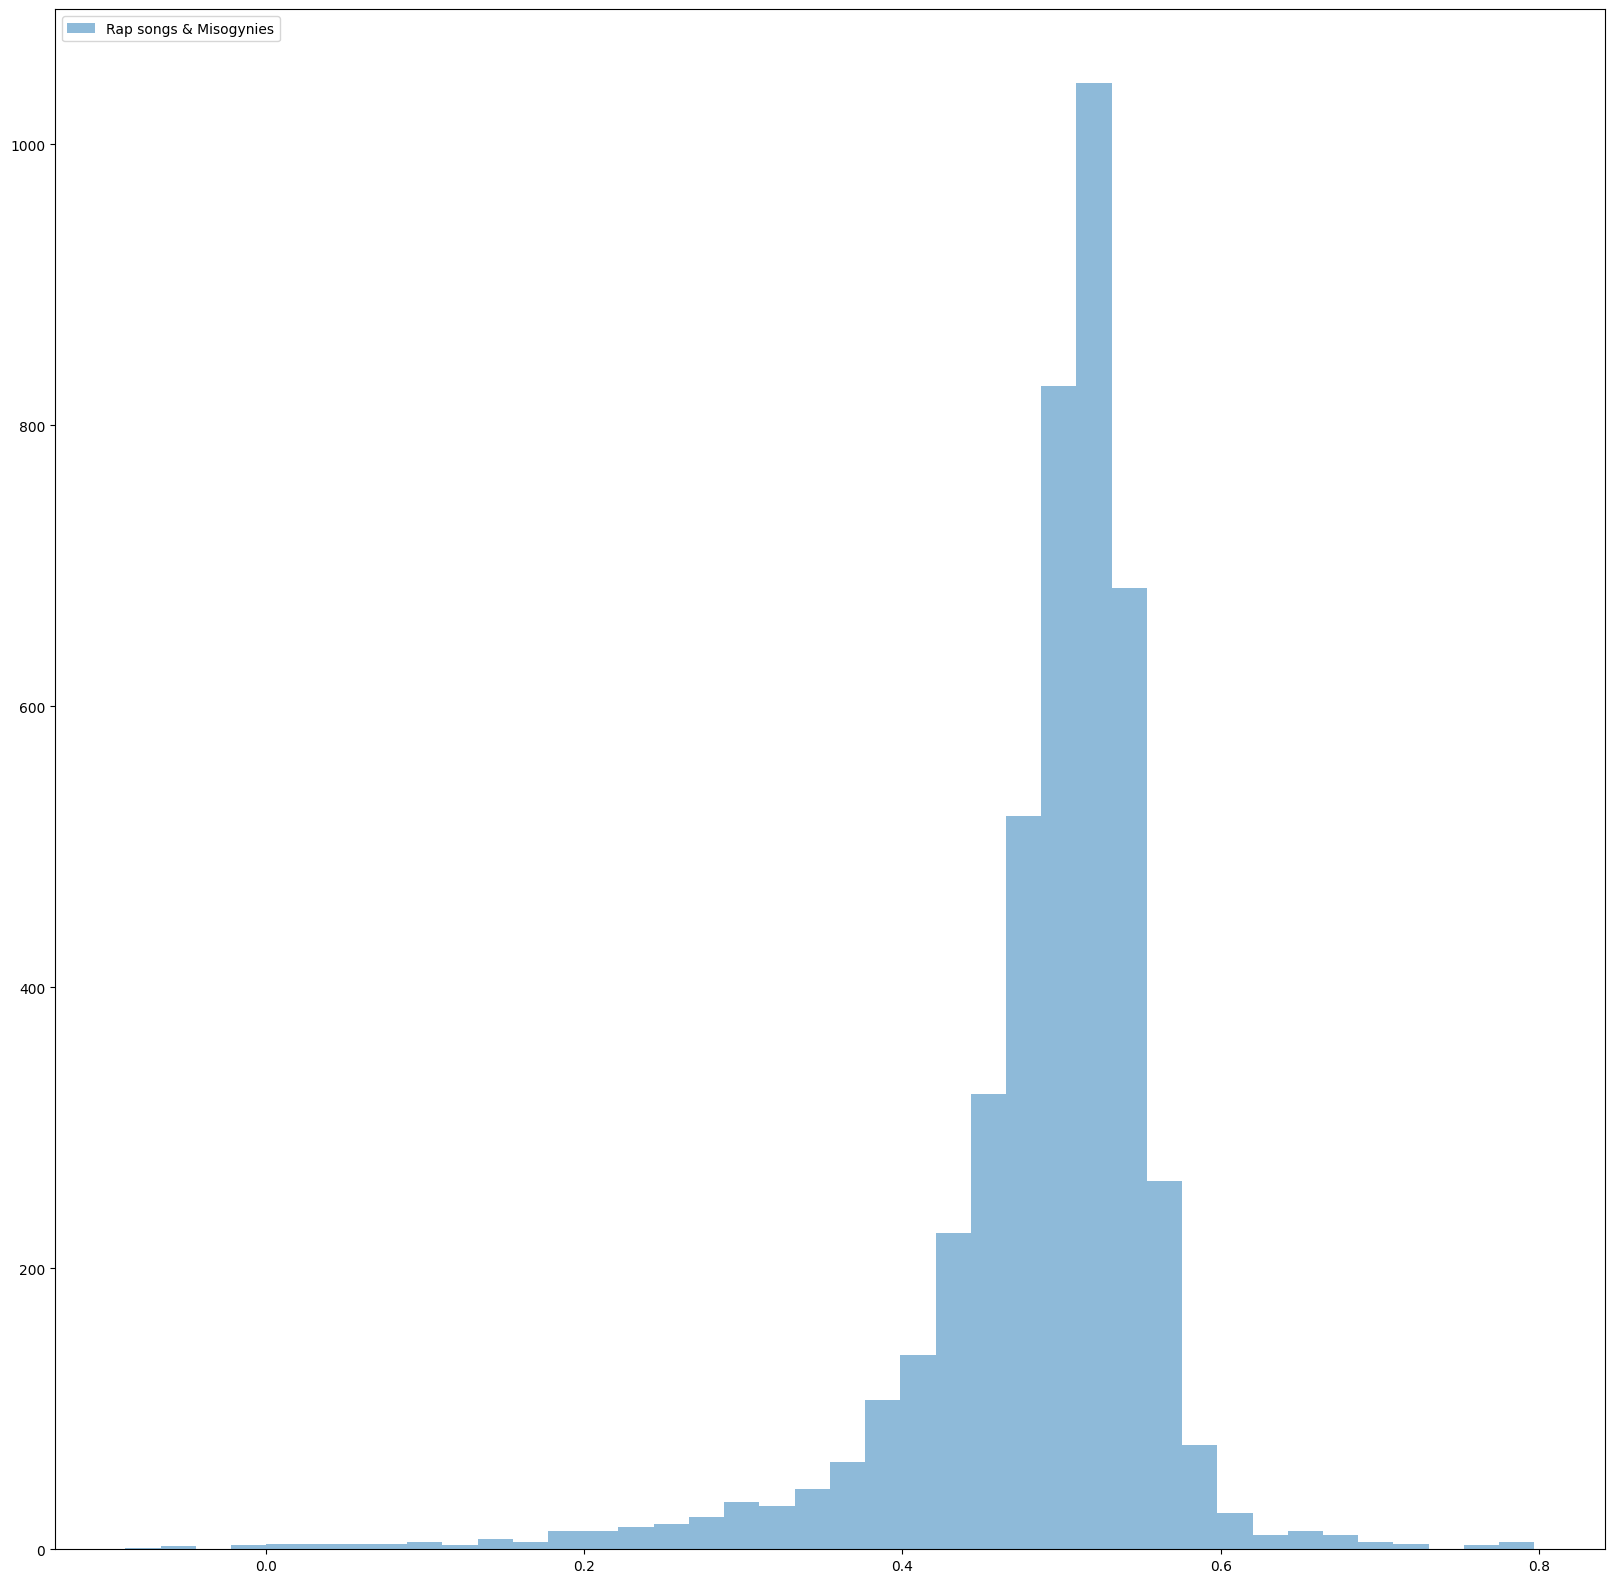

In [ ]:
plt.hist(cosine_similarities_rap_mis, bins=40, alpha=0.5, label='Rap songs & Misogynies')
plt.legend(loc='upper left')
plt.show()

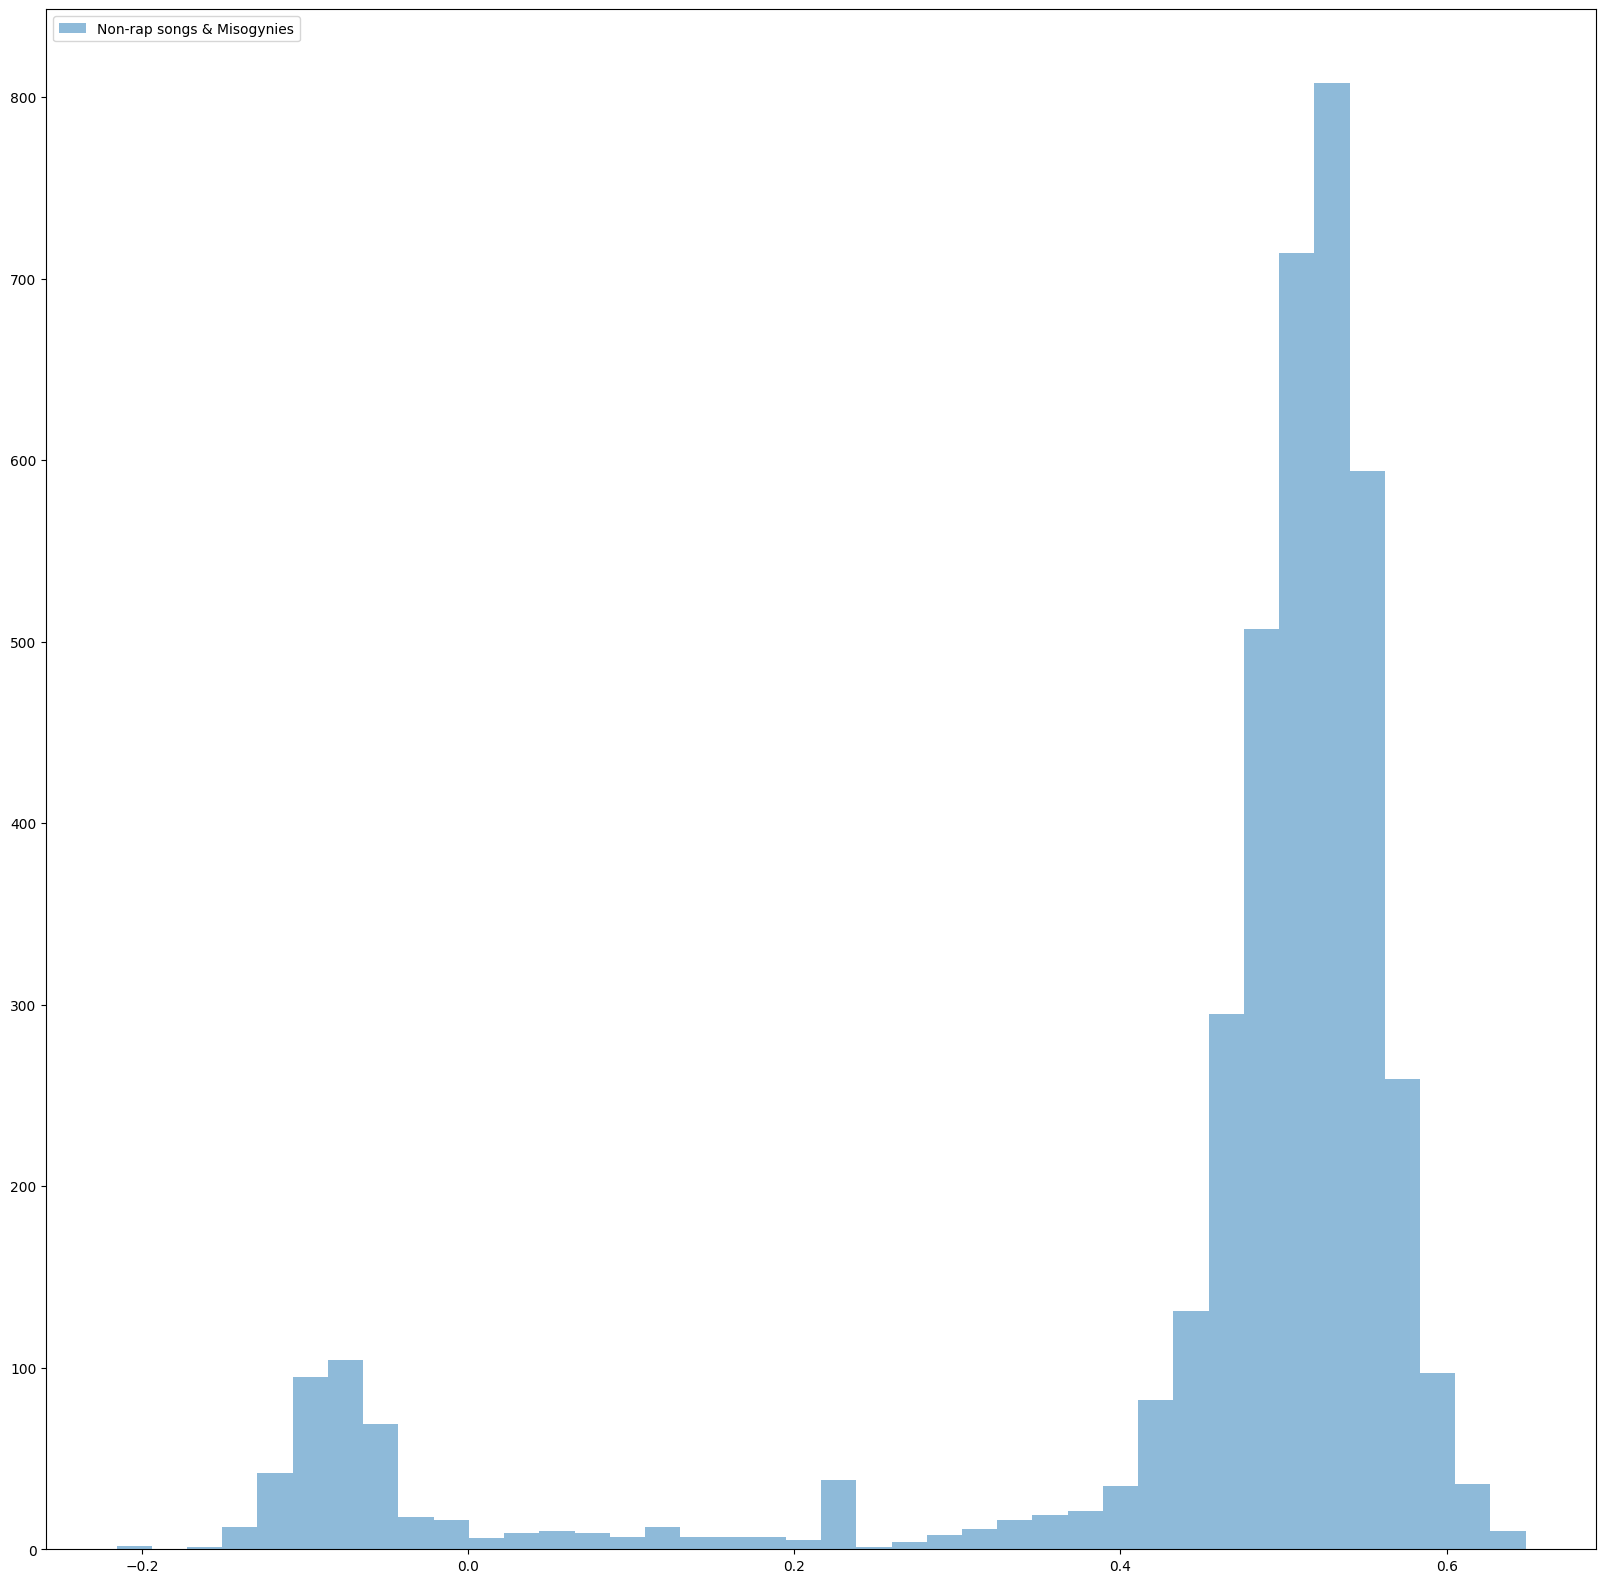

In [ ]:
plt.hist(cosine_similarities_nonrap_mis, bins=40, alpha=0.5, label='Non-rap songs & Misogynies')
plt.legend(loc='upper left')
plt.show()

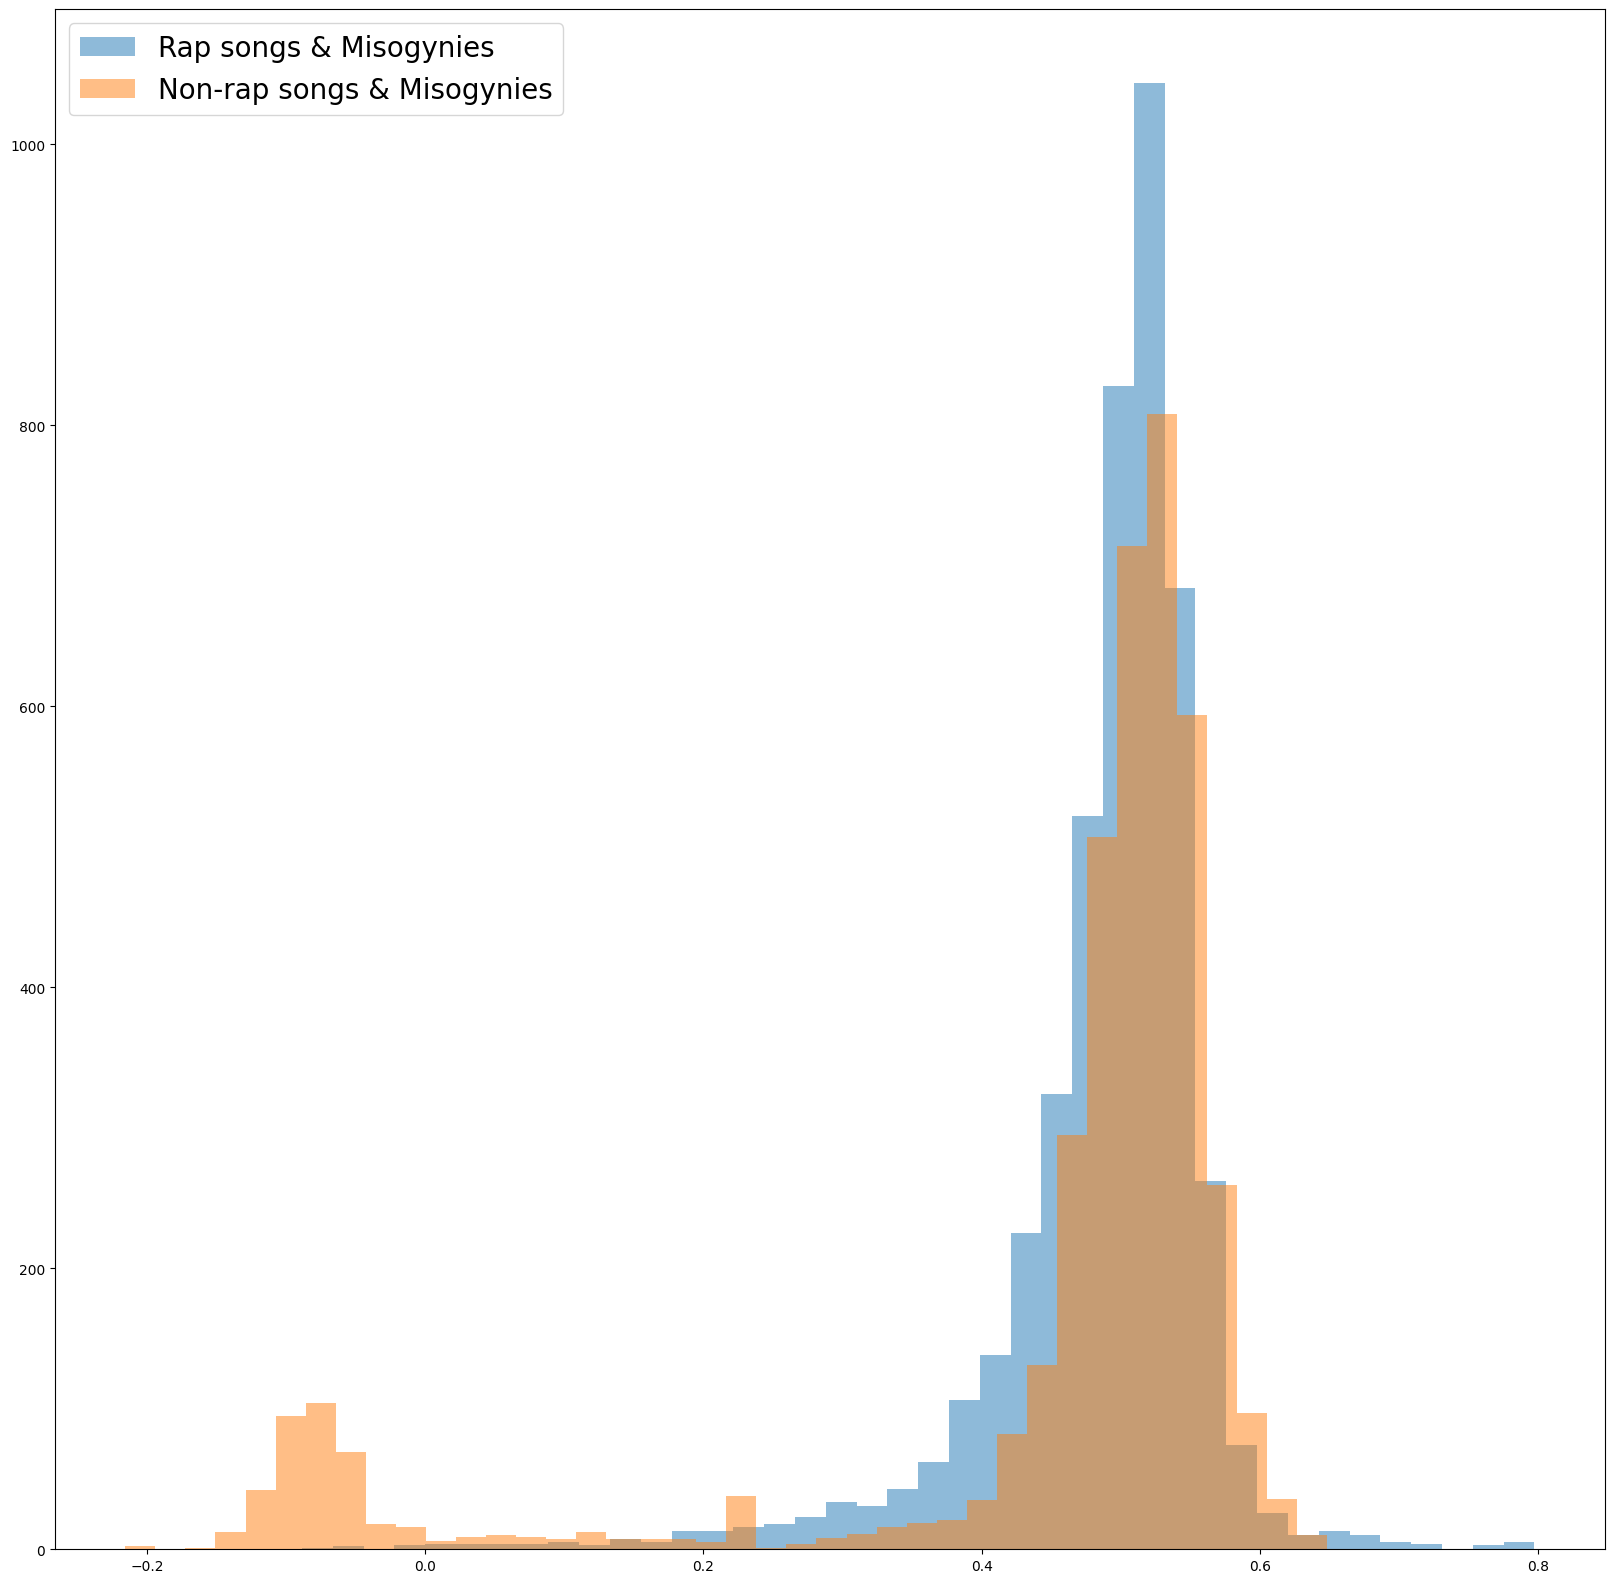

In [ ]:
plt.hist(cosine_similarities_rap_mis, bins=40, alpha=0.5, label='Rap songs & Misogynies')
plt.hist(cosine_similarities_nonrap_mis, bins=40, alpha=0.5, label='Non-rap songs & Misogynies')
plt.legend(loc='upper left', fontsize = 20)
plt.show()

In [ ]:
avg_cos_rap = np.mean(cosine_similarities_rap_mis)
avg_cos_nonrap = np.nanmean(cosine_similarities_nonrap_mis)
print(avg_cos_rap)
print(avg_cos_nonrap)

0.48928735905624365
0.45067828602885873


In [ ]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    a = a[~np.isnan(a)]
    n = len(a)
    m, se = np.nanmean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return  m-h, m, m+h

In [ ]:
mean_confidence_interval(cosine_similarities_rap_mis)

(0.48705337994938475, 0.48928735905624365, 0.49152133816310256)

In [ ]:
mean_confidence_interval(cosine_similarities_nonrap_mis)

(0.44514287782353734, 0.45067828602885873, 0.4562136942341801)

Result Summary

(0.48705337994938475, 0.48928735905624365, 0.49152133816310256)

(0.44514287782353734, 0.45067828602885873, 0.4562136942341801)

If the vectors are similar, the cosine similarity will be close to 1 (cosine of a small angle is close to 1).

If the vectors are dissimilar or orthogonal, the cosine similarity will be close to 0 (cosine of a 90-degree angle is 0).

If the vectors are pointing in opposite directions, the cosine similarity will be close to -1 (cosine of a 180-degree angle is -1).

*Detailed* Genre and Artist Analysis

In [ ]:
cosine_similarities_rap_mis.shape

(4578,)

In [ ]:
cosine_similarities_nonrap_mis.shape

(4125,)

In [ ]:
nonrap_df.shape

(4125, 24)

In [ ]:
df['cos_similarity'] = cosine_similarities_rap_mis

In [ ]:
nonrap_df['cos_similarity'] = cosine_similarities_nonrap_mis

In [ ]:
df_sort_above60 = df.sort_values(by = 'cos_similarity', ascending = False)
df_sort_above60 = df_sort_above60[df_sort_above60['cos_similarity']>0.6]
df_sort_above60.head(10)

,rapper,verse,verse_preprocessed,num_misogyny,cos_similarity
40,Nas,"""Now let me take a trip down memory lane"" ""Comin' outta Queensbridge"" ""Now let me take a trip down memory lane"" ""Comin' outta Queensbridge"" ""Now let me take a trip down memory lane"" ""Comin' outta Queensbridge"" ""Now let me take a trip down memory lane"" ""Comin' outta Queensbridge""","""now let take trip memory lane"" ""comin' outta queensbridge"" ""now let take trip memory lane"" ""comin' outta queensbridge"" ""now let take trip memory lane"" ""comin' outta queensbridge"" ""now let take trip memory lane"" ""comin' outta queensbridge""",False,0.797234
41,Nas,"""Now let me take a trip down memory lane"" ""Comin' outta Queensbridge"" ""Now let me take a trip down memory lane"" ""Comin' outta Queensbridge""","""now let take trip memory lane"" ""comin' outta queensbridge"" ""now let take trip memory lane"" ""comin' outta queensbridge""",False,0.796095
77,CunninLynguists,"Before EPMD met golddiggers fuckin for VISAs I was the first to pimp Jezebel and Mona Lisa And made em famous way before Eminem could flow Even ran trizz with JFK on Marilyn Monroe...Oh - scratching ""Blow the spot with some old school shit"" - Rah Digga on Talib Kweli's ""Down For The Count"" ""I'm so old school""- Jay-Z off of ""Jigga That Nigga"" ""I'm old school like my dad is""- J-Ro on De La Soul's ""My Writes"" ""True, that's old school""- Yasiin Bey off of ""Very Well"" ""I'll bust that old school boom bap all over this map""- Declaime on Lootpacks's ""Episodes"" x ""From the old school I consider loyally true"" - Big Punisher off of ""You Came Up""","epmd met golddiggers fuckin visas first pimp jezebel mona lisa made em famous way eminem could flow even ran trizz jfk marilyn monroe...oh - scratching ""blow spot old school shit"" - rah digga talib kweli's ""down count"" ""i'm old school""- jay-z ""jigga nigga"" ""i'm old school like dad is""- j-ro de la soul's ""my writes"" ""true, that's old school""- yasiin bey ""very well"" ""i'll bust old school boom bap map""- declaime lootpacks's ""episodes"" x ""from old school consider loyally true"" - big punisher ""you came up""",False,0.782403
79,CunninLynguists,"When lightin' struck Ben Frank's kite and sent currents through He was the first to electric boogaloo The wop, robot and helicopter on the pavement And in amazement, he was even Harlem-Shakin' - scratching ""Blow the spot with some old school shit"" - Rah Digga on Talib Kweli's ""Down For The Count"" ""I'm so old school""- Jay-Z off of ""Jigga That Nigga"" ""I'm old school like my dad is""- J-Ro on De La Soul's ""My Writes"" ""True, that's old school""- Mos Def on BlackStarr's ""Very Well"" ""I'll bust that old school boom bap all over this map""- Declaime on Lootpacks's ""Episodes"" x ""From the old school I consider loyally true""- Big Pun off of ""You Came Up""","lightin' struck ben frank's kite sent currents first electric boogaloo wop, robot helicopter pavement amazement, even harlem-shakin' - scratching ""blow spot old school shit"" - rah digga talib kweli's ""down count"" ""i'm old school""- jay-z ""jigga nigga"" ""i'm old school like dad is""- j-ro de la soul's ""my writes"" ""true, that's old school""- mos def blackstarr's ""very well"" ""i'll bust old school boom bap map""- declaime lootpacks's ""episodes"" x ""from old school consider loyally true""- big pun ""you came up""",False,0.779431
52,Immortal Technique,"And I drop it so heavy, it leaves the world unbalanced Exterminate the spiritual force of all that challenge I'm the lyrical apocalypse that crumbles the granite Replacing you as the dominant species on the planet ""Rest in Peace"" ""Here s another warrior's song rep this life to the fullest"" ""Rest in Peace"" ""Mothafucka, say yo prayers!"" ""For brothers who died from black-on-black violence"" ""Rest in Peace"" ""You ain t payin respect when you spose to"" ""Rep this life to the fullest"" ""Rest in Peace"" ""This ain t for y all, this a toast to them""

In [ ]:
df_sort_above60.shape

(72, 5)

In [ ]:
df_sort_above60_rapper = df_sort_above60.groupby('rapper').size().reset_index(name='Count')
df_sort_above60_rapper.sort_values(by = 'Count', ascending = False)


,rapper,Count
8,Eazy-E,6
10,Ice Cube,6
12,Jay-z,5
19,Nas,5
14,Kanye West,5
6,CunninLynguists,5
15,Kendrick Lamar,4
0,A$AP Rocky,4
3,Big L,4
7,Drake,3


Misogynistic Artists: Nas and CunninLynguists (most extreme)

Misogynistic Artists: Eazy-E, Ice Cube, Jay-z, Nas, Kanye West, CunninLynguists (most lyrics being misogynistic)

In [ ]:
df_nonrap_sort = nonrap_df.sort_values(by = 'cos_similarity', ascending = False)
df_nonrap_sort_below30 = df_nonrap_sort[df_nonrap_sort['cos_similarity']<0.3]
df_nonrap_sort_above30 = df_nonrap_sort[df_nonrap_sort['cos_similarity']>0.3]

In [ ]:
df_nonrap_sort_above30_genre = df_nonrap_sort_above30.groupby('Genres').size().reset_index(name='Count')
df_nonrap_sort_above30_genre.sort_values(by = 'Count', ascending = False)

,Genres,Count
39,Country,169
360,Pop; R&B; Black Music,115
218,Indie,75
66,Dance; Pop; Pop/Rock,47
533,Rockabilly; Romântico; Rock,46
...,...,...
255,Industrial; Gótico; Heavy Metal,1
252,Indie; Surf Music; Rock,1
244,Indie; Rock; Country,1
242,Indie; Rock Alternativo; Grunge,1


In [ ]:
df_nonrap_sort_below30_genre = df_nonrap_sort_below30.groupby('Genres').size().reset_index(name='Count')
df_nonrap_sort_below30_genre.sort_values(by = 'Count', ascending = False)

,Genres,Count
156,Reggaeton,22
0,Axé,14
83,J-Pop/J-Rock,13
183,Romântico,12
139,Pop; Pop/Rock; Dance,12
...,...,...
86,J-Pop/J-Rock; K-Pop/K-Rock,1
87,J-Pop/J-Rock; Pop; K-Pop/K-Rock,1
89,J-Pop/J-Rock; Rock; Romântico,1
90,J-Pop/J-Rock; Romântico; Dance,1


In [ ]:
df_nonrap_sort_above30_artist = df_nonrap_sort_above30.groupby('Artist').size().reset_index(name='Count')
df_nonrap_sort_above30_artist.sort_values(by = 'Count', ascending = False)

,Artist,Count
309,Elvis Presley,46
630,Michael Jackson,40
778,Rihanna,38
112,Beyoncé,37
744,Prince,33
...,...,...
507,Kari Jobe,1
508,Kasabian,1
509,Kasino,1
510,Kate Nash,1


In [ ]:
df_nonrap_sort_below30_artist = df_nonrap_sort_below30.groupby('Artist').size().reset_index(name='Count')
df_nonrap_sort_below30_artist.sort_values(by = 'Count', ascending = False)

,Artist,Count
256,Shakira,9
170,Maná,9
271,Thalía,8
200,Netinho,7
237,Ricky Martin,7
...,...,...
123,Jair & Vanise,1
124,James Morrison,1
125,Jammil e Uma Noites,1
126,Jauperi,1


In [ ]:
df_nonrap_sort[df_nonrap_sort['Artist'] == 'Michael Jackson']

In [ ]:
df_nonrap_sort.columns

Index(['Link', 'SName', 'SLink', 'Lyric', 'language', 'Artist', 'Genres',
       'Songs', 'Popularity', 'song_popularity', 'song_duration_ms',
       'acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo',
       'time_signature', 'audio_valence', 'Lyric_split', 'cos_similarity'],
      dtype='object')

In [ ]:
df_nonrap_sort_above30_song_duration = df_nonrap_sort_above30.groupby('song_duration_ms').size().reset_index(name='Count')
df_nonrap_sort_below30_artist_song_duration = df_nonrap_sort_below30.groupby('song_duration_ms').size().reset_index(name='Count')

In [ ]:
df_nonrap_sort_above30_tempo = df_nonrap_sort_above30.groupby('tempo').size().reset_index(name='Count')
df_nonrap_sort_below30_artist_tempo = df_nonrap_sort_below30.groupby('tempo').size().reset_index(name='Count')

**KS Test**

In [ ]:
from scipy.stats import ks_2samp

# perform the KS test on Genre
statistic, p_value = ks_2samp(df_nonrap_sort_above30_genre['Count'], df_nonrap_sort_below30_genre['Count'])

# display results
print("KS Statistic for Genre Distribution in 2 modals:", statistic)
print("P-value:", p_value)

# interpret the results
alpha = 0.05  # significance level
if p_value > alpha:
    print("The samples come from the same distribution (fail to reject the null hypothesis)")
else:
    print("The samples do not come from the same distribution (reject the null hypothesis)")

KS Statistic for Genre Distribution in 2 modals: 0.3402813806573687
P-value: 6.255196308245007e-17
The samples do not come from the same distribution (reject the null hypothesis)


In [ ]:
# perform the KS test on Artists
statistic, p_value = ks_2samp(df_nonrap_sort_above30_artist['Count'], df_nonrap_sort_below30_artist['Count'])

# display the results
print("KS Statistic for Artist Distribution in 2 modals:", statistic)
print("P-value:", p_value)

# interpret the results
alpha = 0.05  # significance level
if p_value > alpha:
    print("The samples come from the same distribution (fail to reject the null hypothesis)")
else:
    print("The samples do not come from the same distribution (reject the null hypothesis)")

KS Statistic for Artist Distribution in 2 modals: 0.29606286120715936
P-value: 9.947775890547613e-19
The samples do not come from the same distribution (reject the null hypothesis)


In [ ]:
# perform the KS test on song duration
statistic, p_value = ks_2samp(df_nonrap_sort_above30_song_duration['Count'], df_nonrap_sort_below30_artist_song_duration['Count'])

# display results
print("KS Statistic for Song Duration Distribution in 2 modals:", statistic)
print("P-value:", p_value)

# interpret the results
alpha = 0.05  # significance level
if p_value > alpha:
    print("The samples come from the same distribution (fail to reject the null hypothesis)")
else:
    print("The samples do not come from the same distribution (reject the null hypothesis)")

KS Statistic for Song Duration Distribution in 2 modals: 0.05783874655699818
P-value: 0.11434597139265228
The samples come from the same distribution (fail to reject the null hypothesis)


In [ ]:
# perform the KS test on tempo
statistic, p_value = ks_2samp(df_nonrap_sort_above30_tempo['Count'], df_nonrap_sort_below30_artist_tempo['Count'])

# display results
print("KS Statistic for Tempo Distribution in 2 modals:", statistic)
print("P-value:", p_value)

# interpret the results
alpha = 0.05  # significance level
if p_value > alpha:
    print("The samples come from the same distribution (fail to reject the null hypothesis)")
else:
    print("The samples do not come from the same distribution (reject the null hypothesis)")

KS Statistic for Tempo Distribution in 2 modals: 0.03163855278780668
P-value: 0.7807962402344863
The samples come from the same distribution (fail to reject the null hypothesis)


Social Implications (Popularity)

In [ ]:
nonrap_df = nonrap_df.dropna(subset=['cos_similarity', 'song_popularity'])

In [ ]:
nonrap_df.columns

Index(['Link', 'SName', 'SLink', 'Lyric', 'language', 'Artist', 'Genres',
       'Songs', 'Popularity', 'song_popularity', 'song_duration_ms',
       'acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo',
       'time_signature', 'audio_valence', 'Lyric_split', 'cos_similarity'],
      dtype='object')

In [ ]:
from scipy.stats import linregress

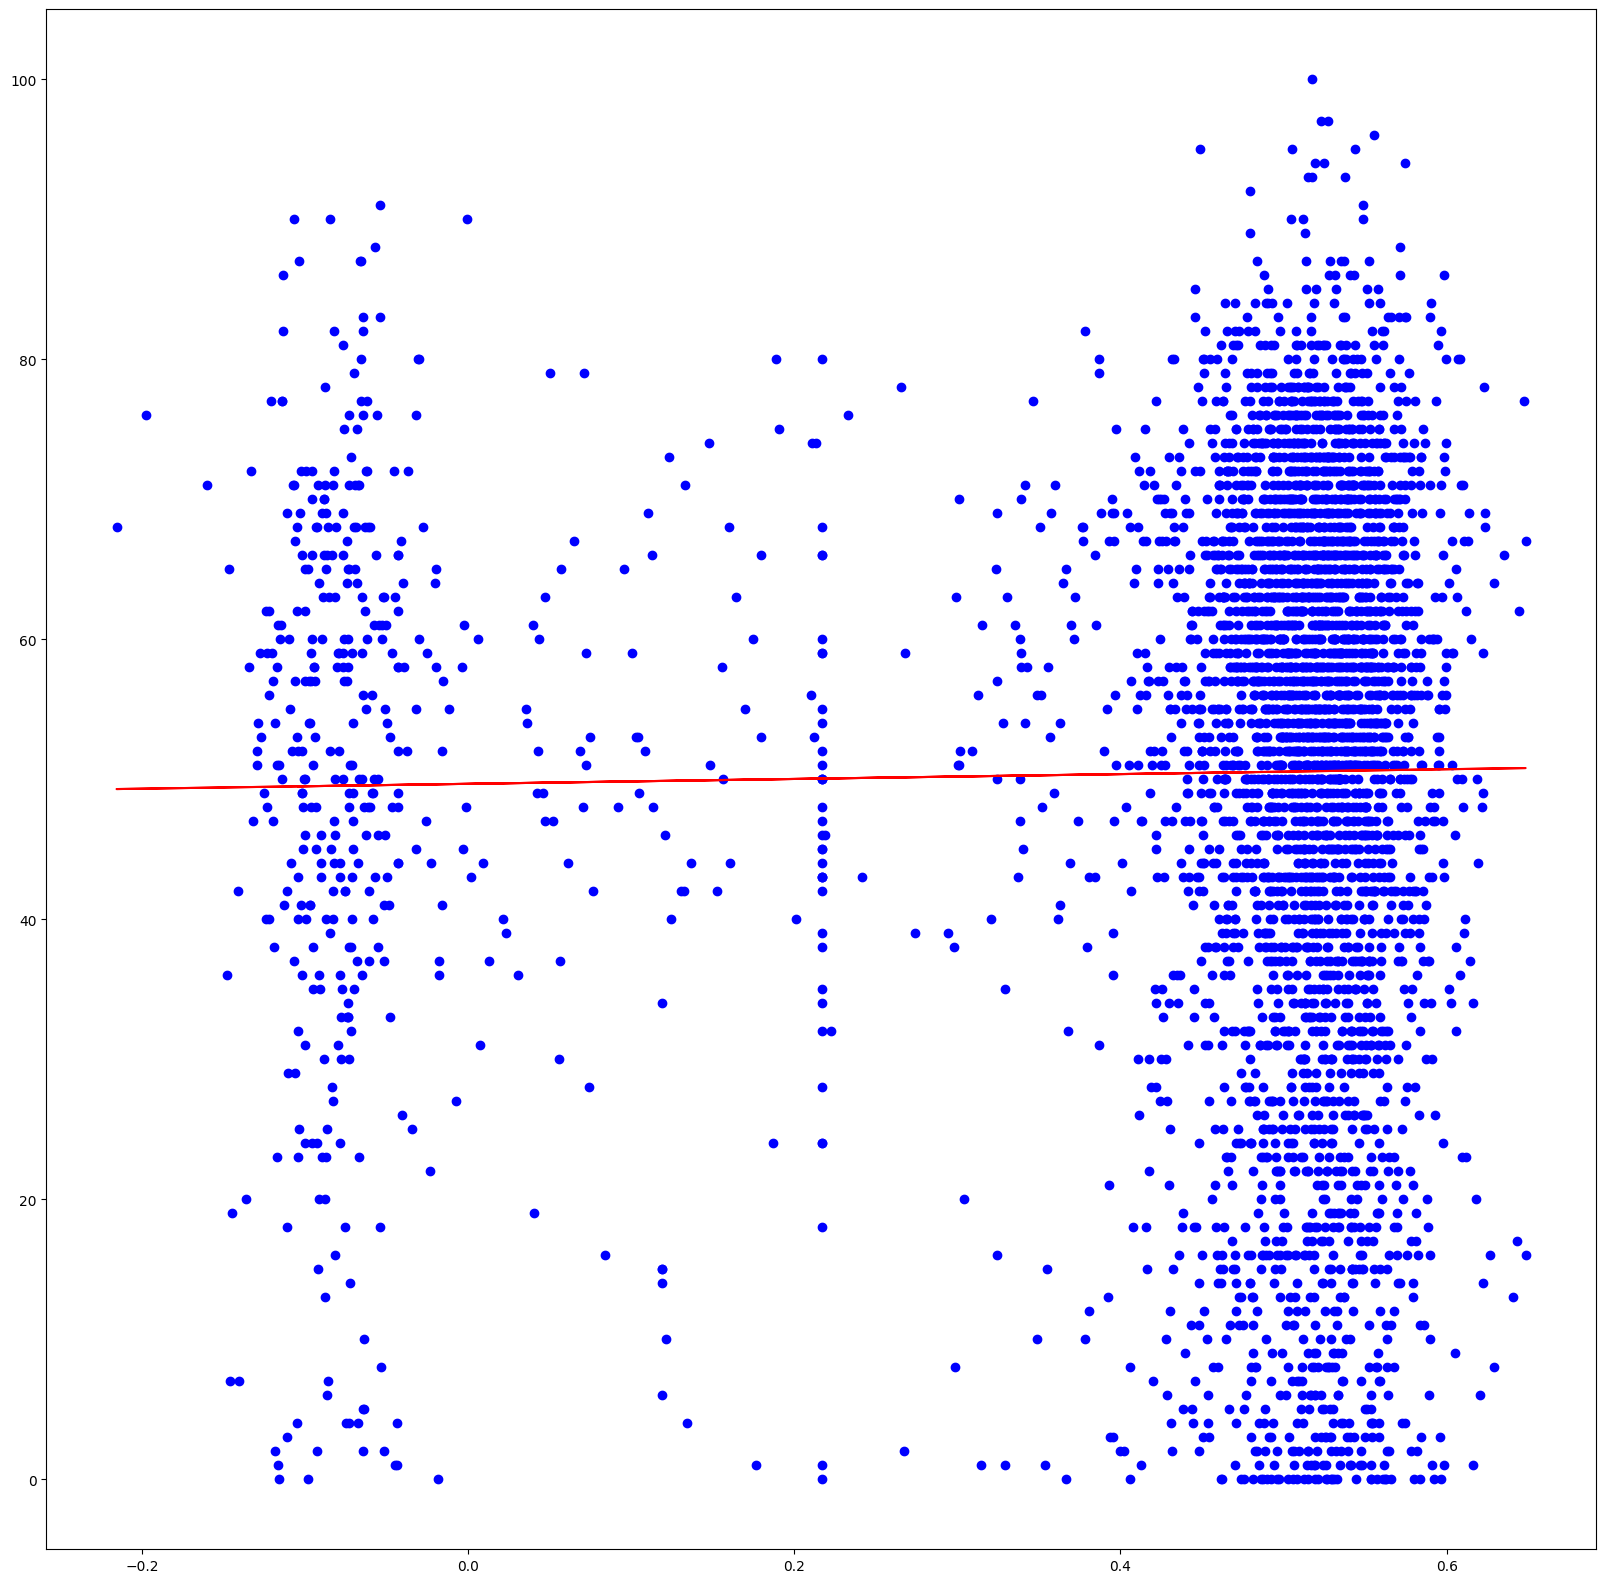

In [ ]:
# song popularity
slope, intercept, r_value, p_value, std_err = linregress(x= nonrap_df['cos_similarity'], y = nonrap_df['song_popularity'])
regression_line = [slope * i + intercept for i in nonrap_df['cos_similarity']]
plt.scatter(x= nonrap_df['cos_similarity'], y = nonrap_df['song_popularity'], color='blue', marker='o', label='Data Points')
plt.plot(nonrap_df['cos_similarity'], regression_line, color='red', label='Regression Line')


In [ ]:
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error: {std_err:.4f}")

Slope: 1.7367
Intercept: 49.6756
R-squared: 0.0002
P-value: 0.3226
Standard Error: 1.7557


Predictive Model


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
words_label['body'].fillna('', inplace=True)
words_label.head(3)


,body,level_1
0,"Do you have the skin of a 80 year old grandma? Worry no more, just drink water!",Nonmisogynistic
1,"This is taking a grain of truth and extrapolating to insanity.\n\nStay hydrated, it's healthy, you'll look and feel better. It will not reverse the aging process though.",Nonmisogynistic
2,Honestly my favorite thing about this is that they feel the need to cite beauty professionals in order to prove that dehydration is caused by not drinking enough water.,Nonmisogynistic


In [ ]:
# Bag of Words representation
vec = CountVectorizer ()

X = vec.fit_transform (words_label['body'])
y = np.array (words_label['level_1'])

In [ ]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y ,
                                                    test_size=test_size,
                                                    random_state=0)

In [ ]:
# classifier model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
yhat = clf.predict (X_test)
yhat_prob = clf.predict_proba (X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print (classification_report (y_test, yhat))


                 precision    recall  f1-score   support

   Misogynistic       0.79      0.54      0.64       147
Nonmisogynistic       0.94      0.98      0.96      1167

       accuracy                           0.93      1314
      macro avg       0.87      0.76      0.80      1314
   weighted avg       0.93      0.93      0.93      1314



In [ ]:
# Make prediction on all non rap songs
nonrap_pred = vec.transform (nonrap_df['Lyric'])
nonrap_lyrics_pred = clf.predict(nonrap_pred)
nonrap_lyrics_pred_prob = clf.predict_proba(nonrap_pred)

In [ ]:
nonrap_df['misogyny_pred_prob'] = nonrap_lyrics_pred_prob[:,0]
nonrap_df['nonmisogyny_pred_prob'] = nonrap_lyrics_pred_prob[:, 1]

In [ ]:
data = {"lyrics" : nonrap_df['Lyric'],
        "misogyny" : nonrap_lyrics_pred}
df_pred_nrap= pd.DataFrame(data)

Correlation between song misogyny and popularity

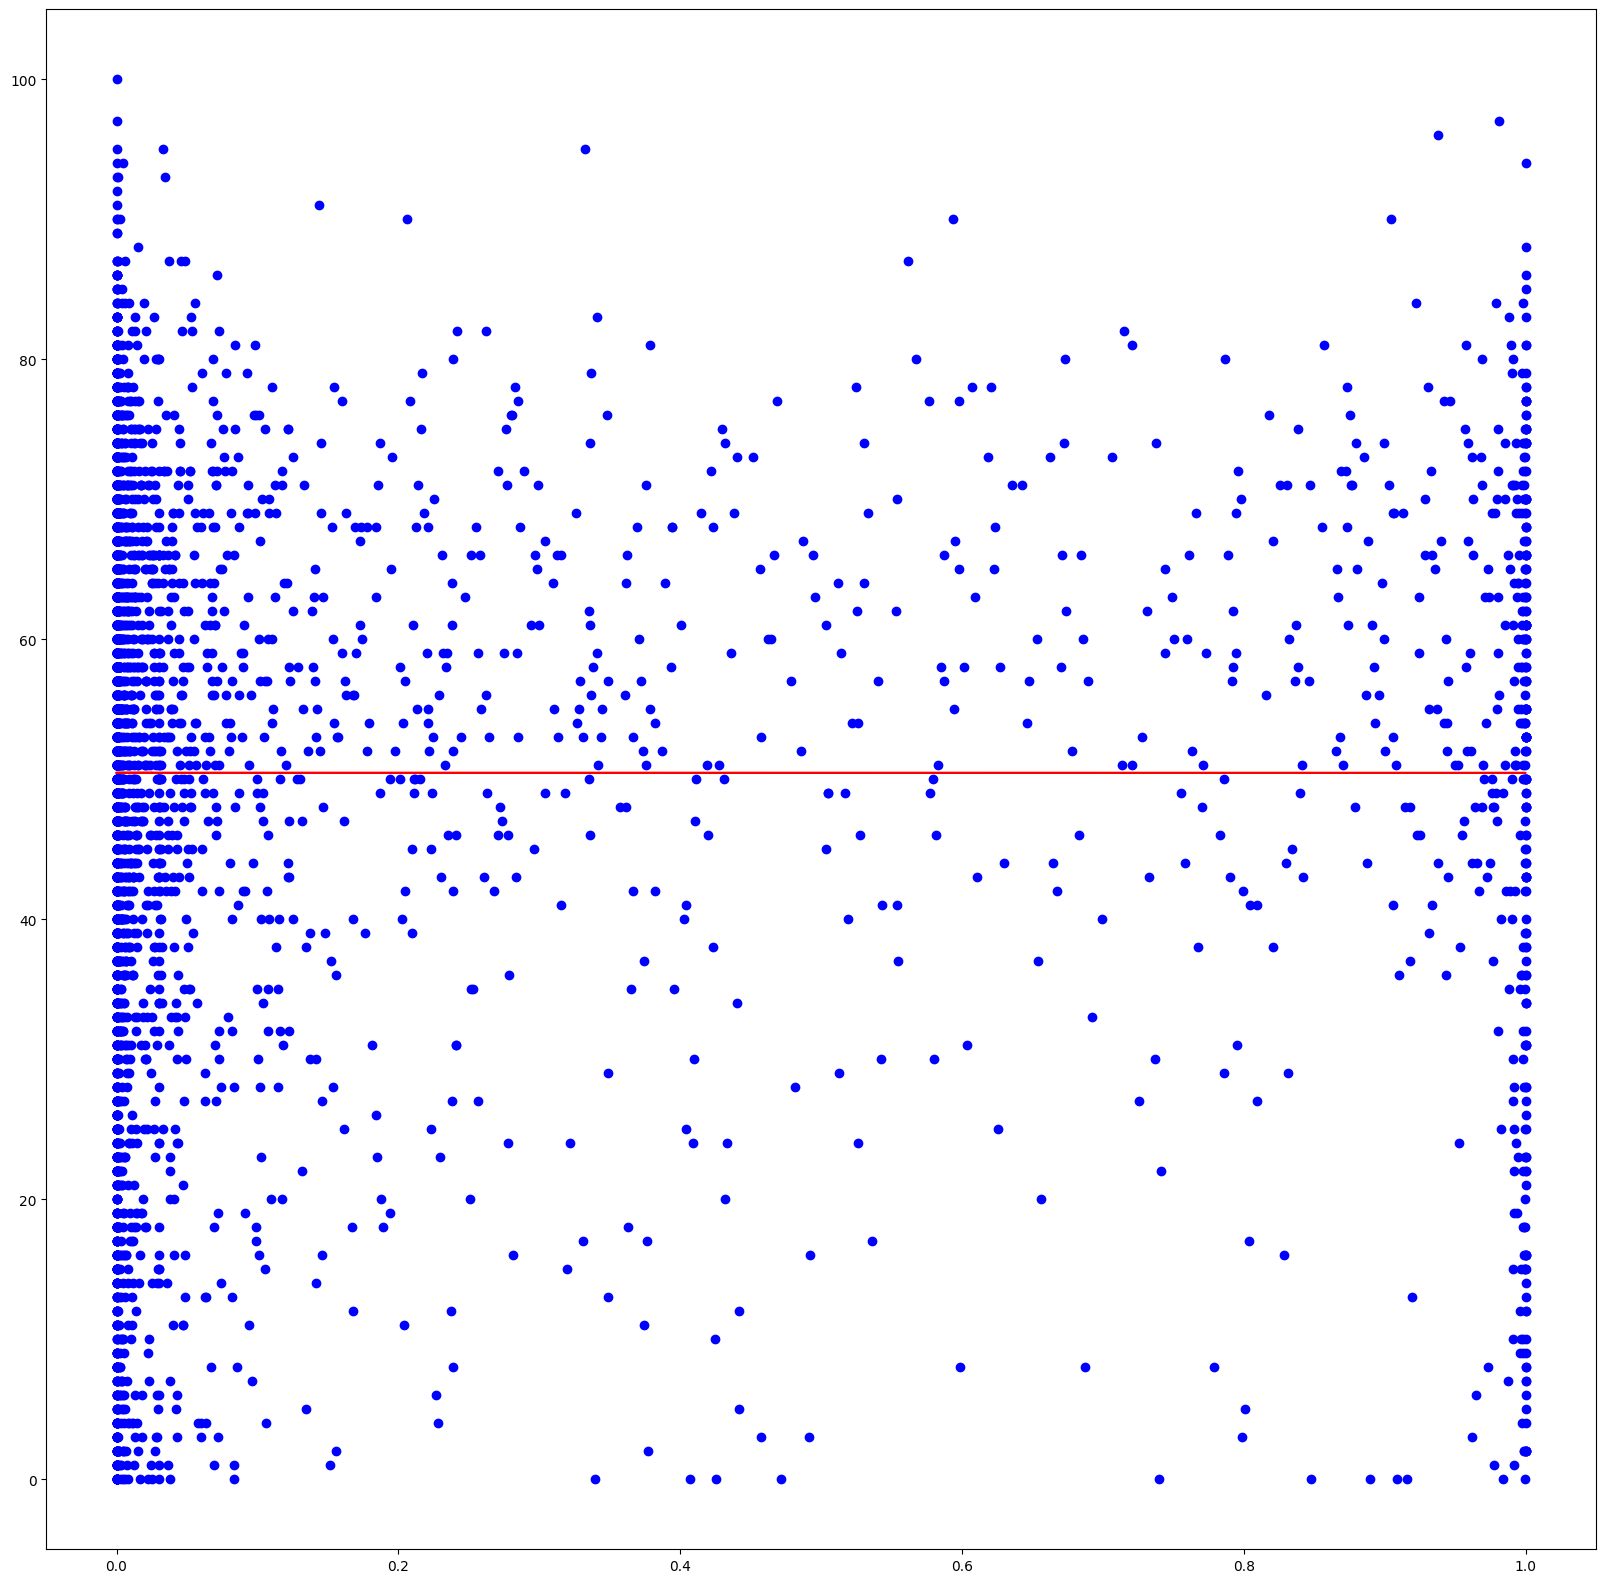

In [ ]:
slope, intercept, r_value, p_value, std_err = linregress(x= nonrap_df['misogyny_pred_prob'], y = nonrap_df['song_popularity'])
regression_line = [slope * i + intercept for i in nonrap_df['misogyny_pred_prob']]
plt.scatter(x= nonrap_df['misogyny_pred_prob'], y = nonrap_df['song_popularity'], color='blue', marker='o', label='Data Points')
plt.plot(nonrap_df['misogyny_pred_prob'], regression_line, color='red', label='Regression Line')


In [ ]:
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error: {std_err:.4f}")

Slope: -0.0035
Intercept: 50.4588
R-squared: 0.0000
P-value: 0.9972
Standard Error: 1.0229


Further predictions

In [ ]:
# Use our model for actual predictions

verse_pred = vec.transform (df['verse_preprocessed'])

In [ ]:
mis_lyrics_pred = clf.predict(verse_pred)
mis_lyrics_pred_prob = clf.predict_proba(verse_pred)

In [ ]:
mis_lyrics_pred

array(['Misogynistic', 'Misogynistic', 'Nonmisogynistic', ...,
       'Misogynistic', 'Nonmisogynistic', 'Nonmisogynistic'], dtype=object)

In [ ]:
mis_lyrics_pred_prob

array([[1.00000000e+00, 4.84089178e-16],
       [8.51424406e-01, 1.48575594e-01],
       [3.03167358e-02, 9.69683264e-01],
       ...,
       [9.07482458e-01, 9.25175419e-02],
       [3.30732587e-04, 9.99669267e-01],
       [5.46767814e-03, 9.94532322e-01]])

In [ ]:
data = {"lyrics" : df['verse_preprocessed'],
        "misogyny" : mis_lyrics_pred}
df_pred = pd.DataFrame(data)

In [ ]:
df_pred.head(10)

,lyrics,misogyny
0,chickens sink crack stove triple beam weight cut middle man tryna get white bitches snorting plate coke colombia riding round benz looking like trap star flipping raw day night tryna get money right naw ain't living rite fucking bitches night kick 'em next day everyday pay day hit half bring back two days living cali ocean condo got em open long dick stroke em send 'em husband fussing i'm fucking loving puffing heavenly rock star 's slim pants ripped jeans jeremy scott wings fucking heavily counting cream rolling beans disobedient trees tatted neck ear bitches want stare macking hoes pose hand draws henny pores pour hit blunt much dash pass hook coke white bitches coke white bitches coke white bitches coke white bitches coke white bitches coke white bitches coke white bitches coke white bitches,Misogynistic
1,"see car bitch going fast gotta shorty, smash licks at? lets hit mossberg shotty saying get back",Misogynistic
2,,Nonmisogynistic
3,"damn! set 'dat bitch white bitch sniff coke look like kate moss smoking purple, randy moss shrimp, calamari tomato sauce never ever thinking santa claus mama workin' ass put new product drop next like penny hardaway got ball post hood like i'm feet tall hands nuts saying, ""fuck law!"" everything spit cut raw flow like pcp glass jar",Misogynistic
4,"heard talking heard got jokes can't understand dick throat balls mouth hands coat need touching might go broke need fucking dope got tight, ain't acting right keep popping popping outside give reason scare tonight act like yo' ass got sense wanna tell itty bitty bitches need mind fucking business end meeting bottom temp itty bitty niggas need mind fucking bitches tell little wifey public connects. ? woah. woah. send bitch send bitch send bitch",Misogynistic
5,"deniro, fetti, provolone, guap guap deniro, fetti, provolone, guap guap deniro, fetti, provolone, guap guap deniro, fetti, provolone, guap guap see money, get see money, get see money, chase see money, chase see money, get see money, get see money, chase see money, chase deniro, fetti, provolone, guap guap deniro, fetti, provolone, guap guap",Misogynistic
7,still trapping mall gold chain looking fraud spilled lean clothes fuck sucking dick night see pull car looking like million bucks million dollar baby feeling like i'm max b yacht i'm wavy feeling like i'm max b wavy bitch got crazy,Misogynistic
8,"bet i'll tell bitch suck dick rub clit benzo white lookin' like bowl grits goddamn fans shows wylin' out, startin' mosh pits goddamn pourin' everyday, connected pharmacist whoo might pop another pill, might sip lean go! wu-tang forever, keepin' licks got cream uh future bright, see motherfuckin' gleam put city always put team whoa skyhook competition like i'm kareem mm twin , ? fuck niggas fronted fronted cause done done like turd shitted like turd shitted niggas want want it, want fuck bitch fuck bitch gold daytons gold daytons candy paint skrrrt i'm rollin' stank goddamn i'm sippin' lean goddamn i'm molly goddamn psychedelics goddamn goddamn like i'm john lennon much money need money counter many drugs i'm bout overdose ' much money need money counter many drugs i'm bout overdose thumbin' motherfuckin' damn hundreds thumbin' motherfuckin' damn hundreds much money need money counter many drugs i'm bout overdose",Misogynistic
9,much money need money counter many drugs i'm bout overdose much money need money counter many drugs i'm bout overdose thumbin' motherfuckin' damn hundreds thumbin' motherfuckin' damn hundreds much money need money counter many drugs i'm bout overdose ridin round slow...ridin round slow...ridin round slow...ridin ridin slow,Misogynistic
10,ridin round slow...ridin round slow...ridin round slow...ridin ridin slow,Nonmisogynistic


Cross Domain Comparison

In [ ]:
df_sample_2 = df.sample(n = 100, random_state = 10010)


In [ ]:
df_sample_2.to_csv('df_sample_2.csv', index=False)
from google.colab import files
files.download('df_sample_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# sample 100 verses from `df` to make cross domain comparison

df_sample = pd.read_csv("/content/drive/MyDrive/QTM340 Final Project/Misogynies/df_sample.csv")
df_sample.shape

(201, 5)

In [ ]:
df_sample.columns

Index(['Unnamed: 0', 'rapper', 'verse', 'num_misogyny', 'misogyny_label'], dtype='object')

In [ ]:
X_lyrics = vec.transform(df_sample['verse'])
y_lyrics = np.array (df_sample['misogyny_label'])

In [ ]:
test_size = 0.5
X_train, X_test, y_train, y_test = train_test_split(X_lyrics, y_lyrics,
                                                    test_size=test_size,
                                                    random_state=0)

In [ ]:
clf2 = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
yhat = clf2.predict (X_test)

In [ ]:
print (classification_report (y_test, yhat))

                 precision    recall  f1-score   support

   Misogynistic       0.70      0.53      0.60        36
Nonmisogynistic       0.77      0.88      0.82        65

       accuracy                           0.75       101
      macro avg       0.74      0.70      0.71       101
   weighted avg       0.75      0.75      0.74       101



4. If songs rated high on misogyny is actually misogynous




In [ ]:
percentage_misogynistic_rap = (df_pred['misogyny'].value_counts().get('Misogynistic', 0) / len(df_pred['misogyny'])) * 100
percentage_misogynistic_nonrap = (df_pred_nrap['misogyny'].value_counts().get('Misogynistic', 0) / len(df_pred_nrap['misogyny'])) * 100


In [ ]:
percentage_misogynistic_nonrap

13.554801163918526

In [ ]:
percentage_misogynistic_rap

34.01048492791612

In [ ]:
df_pred_mis = df_pred[df_pred['misogyny']=='Misogynistic']

In [ ]:
np.random.seed(10010)
df_pred_mis_check = np.random.choice(df_pred_mis['lyrics'], size= 5, replace= False)

In [ ]:
df_pred_mis_check[0]

"y'all give fuck punk bitch stank cause breath always stank every time take drank 's downin', i'm drownin' let hit joint i'll clownin' everybody else"

y'all give fuck punk bitch stank cause breath always stank every time take drank 's downin', i'm drownin' let hit joint i'll clownin' everybody else

In [ ]:
df_pred_mis_check[1]

"i've asked told things mind change still feel what's life fun? please, ashamed i've mine, yours, know.. know get like wish die real 'cause truth hurts lies heal can't sleep thinking lies still cry still, tears pillowcase big girls get little taste pushing away give space dealing heart break you, care keep thinking know tryna run that, say done face, girl, show ready, say ready baggage ain't heavy party's over, forget we'll change pace we'll go slow ever worry, ever hide seen mistakes look eyes"

In [ ]:
df_pred_mis_check[2]

'cat eyes, nine lives, tan lines, thigh highs ride like drive by, i\'m real niggas sci-fi that\'s neither there, contemplatin short hair said tryna different like rest bitches that\'s neither there, dick chair sexual warfare, loaded like software got many hoes i\'m hoeing, one worth knowing yeah, dirt, that\'s flowers grow ain\'t tripping, tripping ain\'t got shit me, keep sniffing look, girl, gimme brain, i\'ll return favor hoes say i\'ma dog, come chase \'em? lick chaser, pick line wanted time, say, "okay i\'m honor" wanting break since dolce gabbana ass like, "come sit groceries counter" drink tea, drink wine, call tijuana dying meet girl, want meet momma swear may go issey miyake, bond no. weed funky, i\'m smelling fine, tunechi!'

In [ ]:
df_pred_mis_check[3]

'must used finer things infatuated money brings seems hoes never change that\'s left us exchange verse devin dude let holla \'cha, b short, check got fucking bitch swallowed cum drunk piss stuck fist cock, budge move sucking fucking, mayne, loved bust , , , nuts mouth, come house know that\'s bitch, tell nobody shit keeps cool, said pussy\'s mine way rhyme, let fuck time i\'m thinking keeping bitch side girl fine niggas, dreamed fucked lied i\'m numero uno, one bitch me, chewing nuts like bologna click, licked dick like plop nut skeeted like thick white snot saw still hard said "look got" rubbed it, hugged, shoved cock tried tell stop, bitch listen guess dick that\'s hard rock hoes missing return, used stolen credit card cases later get bone gives fuck faces'

In [ ]:
df_pred_mis_check[4]

"hell nah, i'm waiting call told i'll back, break walls issues say comes seeing dad keep moving hard stay away stay touch girl, heart broke need crutch thought okay nights stayed ass got layed up, girl never gave us, tried take day day, whew tough know young gotta live life thought right time wife ya must confess, miss days laying chest confusing losing love, i'm saying god bless better, used move together together, new forever? eyes window soul open eyes bring cold dreams keep warm night baby keep 'em closed eyes window sneak night eyes see soul staring back mine"

In [ ]:
df_pred_mis_nrap = df_pred_nrap[df_pred_nrap['misogyny']=='Misogynistic']
np.random.seed(10010)
df_pred_mis_check_nrap = np.random.choice(df_pred_mis_nrap['lyrics'], size= 10, replace= False)

In [ ]:
df_pred_mis_check_nrap[0]

"Go Tell it on The Mountain Over The Hills and Everywhere Go Tell it on The Mountain That Jesus Christ is Born  I Want you to go Tell them he's a healer I Want you to go Tell them he's our Savior and Master  Oh, go tell it Tell them he's a deliverer Tell it, go tell it That Jesus Christ is born Oh, go tell it Tell it, go tell it  That Jesus Christ, is born"

In [ ]:
df_pred_mis_check_nrap[1]

"I'm thirty-something Going on thirteen Still a sponge to everything Saucer eyes Why, yeah, I still believe And a sparkle in my steps Smiling with my teeth They say that I might lose My midas touch They also say I may become irrelevant  But who the fuck are they anyway? I don't care what they say  I won't act my age Time is just an invention that is made No, I won't act my age It's just my reflection that is out of date 'cause it's all in your attitude It's all in your point of view I won't act my age Just need a little bit of peter pan And some imagination No, I won't act my age  So, I recommend that you lose your mind It was the only thing That was keeping me behind They say curb your curiosity They also say prepare To amend your dreams  But who the fuck are they anyway? I don't care what they say  'cause I won't act my age Time is just an invention that is made No, I won't act my age It's just my reflection that is out of date 'cause it's all in your attitude It's all in your point 

In [ ]:
df_pred_mis_check_nrap[2]

"You know I love women,  Mujere loca Mujere rica Mujere linda Mujere latina...  Mujere, girls, a mi me encanta la Mujere, girls, en la manana la Mujere, girl, y por la noche la Mujeres (girls [x4]) let me break it down for you Pero ten cuidado (capitulo uno) Si tu esta ?? (eh, tiger woods) Y ma que nada si esta casado (eso no llame a ti en manera?) Ella te deja, y majinate embarcado Cacho plantado y sin ello...  Ensa dio support (capitulo dos) Le tiengo mido del child support (a yai yai) You better pay that child support (that's right) Si no te llevan par el court Ay mi madre no le digas eso es un mala palabra...  Esa bariga (capitulo tres) De quien sera esa bariga (ay mi madre) Esa bariga no es mia (eso no es mio) Porque me hice surjuria Y no es hablando de el bombita, yo funcione sin pastillas...  Mujere, girls, a mi me encanta la Mujere, girls, en la manana la Mujere, girl, y por la noche la Mujeres Girls Girls Girls Girls  A la mujeres (capitulo cuarto) Le encanta acer ser los unia

In [ ]:
df_pred_mis_check_nrap[3]

'Early morning, she wakes up Knock! Knock! Knock! On the door It\'s time for makeup, perfect smile It\'s you they\'re all waiting for They go  "Isn\'t she lovely this Hollywood girl? " And they say  She\'s so lucky, she\'s a star But she cry, cry, cries In her lonely heart, thinking If there\'s nothing missing in my life Then, why do these tears come at night?  Lost in an imanage, in a dream But there\'s no one there to wake her up And the world is spinning And she keeps on winning But tell me what happens when it stops? They go  "Isn\'t she lovely this Hollywood girl? " And they say  She\'s so lucky, she\'s a star But she cry, cry, cries In her lonely heart, thinking If there\'s nothing missing in my life Then, why do these tears come at night?  "Best actress, and the winner is Lucky! " "I\'m Roger Johnson for Pop News Standing outside the Arena waiting for Lucky Oh, my God, here she comes! "  Isn\'t she lucky this Hollywood girl? She is so lucky, but why does she cry? If there\'s not

In [ ]:
df_pred_mis_check_nrap[4]

"Whenever I was frightened Or if I ever felt alone I turned to the night sky And a star I call my own  Somewhere I could run to Just across the milky way If you like I could take you It's just a light year and a day  We can sail away tonight On a sea of pure moonlight We can navigate the stars Bring us back home  In a place so far away We'll be young, that's how we'll stay Every wish is a command When we find ourselves in never Neverland  Through all my make believe There's some reality In your reflection There's much more than you see  All that you hope for You hope for today Is the love someone gives you In an unconditional way  We can sail away tonight On a sea of pure moonlight We can navigate the stars To bring us back home  In a place so far away We'll be young, that's how we'll stay Every wish is a command When we find ourselves in never Neverland  Picture a land you never have seen Life is eternal and evergreen Future of happiness all in your hands All in this place I created T

In [ ]:
df_pred_mis_check_nrap[9]

'Summer rain taps at my window West wind soft as a sweet dream My love warm as the sunshine Sittin\' here by me, She\'s here by me  She stepped out of the rainbow Golden hair shinin\' like moon glow Warm lips soft as a soul Sitting here by me, yeah She\'s here by me  All summer long we spent dancin\' in the sand And the jukebox kept on playin\' "Sgt. Pepper\'s Lonely Hearts Club Band"  We sailed into the sunset Drifting home caught by a gulf stream Never gave a thought for tomorrow Just let tomorrow be, now Let tomorrow be  Instrumental interlude  She wants to live in the Rockies She says that\'s where we\'ll find peace Settle down, raise up a fam\'ly To call our own, yeah We\'ll have a home  All summer long we spent groovin\' in the sand Everybody kept on playin\' "Sgt. Pepper\'s Lonely Hearts Club Band"  The snow drifts by my window North wind blowin\' like thunder Our love\'s burnin\' like fire And she\'s here by me, yeah She\'s here with me Let tomorrow be'